In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Data load

In [3]:
#data=pd.read_table('datos.txt')

In [4]:
data=pd.read_csv("datos/datos3.csv")
data=data.rename(columns={'Unnamed: 0':'No'})
data=data.drop('No',axis=1)

In [5]:
data

,X,Y,RV,I
0,144.83,19.6,-248.768878,73.97
1,143.49,19.6,-249.728170,94.17
2,142.15,19.6,-252.788768,101.40
3,140.81,19.6,-260.371743,118.20
4,139.46,19.6,-270.284427,180.00
...,...,...,...,...
595,71.07,0.0,-223.644563,471.50
596,69.73,0.0,-223.827285,631.80
597,68.39,0.0,-223.827285,729.80
598,67.05,0.0,-224.740897,339.00


Bidimensional Data Display

(61.75399999999999, 148.786, -0.9800000000000001, 20.580000000000002)

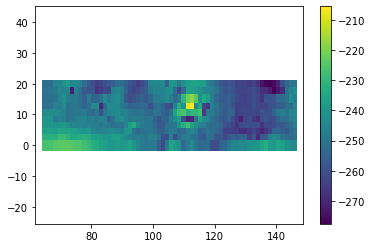

In [6]:
plt.scatter(data.X,data.Y,c=data.RV, s=100,marker='s')
plt.colorbar()
plt.axis('equal')

Weighted Second order Structure Function (Arthur et al. 2016):
$$S_{2}(l)=\frac{\langle {( v(\overrightarrow{x}+\overrightarrow{l})-v(\overrightarrow{x}) )}^{2} I(\overrightarrow{x}+\overrightarrow{l})I(\overrightarrow{x}) \rangle}{\sigma^{2} \sum I(\overrightarrow{x}+\overrightarrow{l})I(\overrightarrow{x})} $$

Data Rearrange

In [7]:
df1=abs(data)
df1n=df1.to_numpy()

df1=abs(data)
df1n=df1.to_numpy()
xl=[row[0] for row in df1n]
yl=[row[1] for row in df1n]
fl=[row[2] for row in df1n]
gl=[row[3] for row in df1n]

x1=[xl]
y1=[yl]
f1=[fl]
g1=[gl]

x=list(map(list, zip(*x1)))
y=list(map(list, zip(*y1)))
f=list(map(list, zip(*f1)))
g=list(map(list, zip(*g1)))

Structure Function code

In [8]:
sig2=2*(data.RV.var())#Change to header third column
fm=np.nanmean(f)
fv=np.nanvar(f,ddof=1)
fs=np.nanstd(f,ddof=1)
l=len(f)
S=[[fm],[fv],[fs],[l]]

In [9]:
a=[[0]*(l) for i in range(l)]
b=[[0]*(l) for i in range(l)]
c=[[0]*(2) for i in range(l*l)]

In [10]:
a1=[[0]*(l) for i in range(l)]#MatrixForStatisticalFunctionComputation
c1=[[0]*(1) for i in range(l*l)]#Main Matrix [a,b]

In [11]:
for i in range(l):
    for j in range(l):
        if i > j:
            a1[i][j]=(g[j][0]*g[i][0])

for j in range (l):
    for i in range (l):
        c1[i+j*(l)][0]=a1[i][j]

In [12]:
W=np.sum(g)
W

1366343.6800000002

In [13]:
# Weighted Second Order Structure Function Matrix [LxL] I
for i in range(l):
    for j in range(l):
        if i > j:
            a[i][j]=(((f[j][0]-f[i][0])**2)*(g[j][0]*g[i][0]))/(fv*W)  

In [14]:
#Coord Matrix [LxL]
for i in range(l):
    for j in range(l):
        if i > j:
            b[i][j]=((x[i][0]-x[j][0])**2+(y[i][0]-y[j][0])**2)**0.5 

In [15]:
#LxL to Lx2
#Main Matrix  [(L*L)x2]
for j in range (l):
    for i in range (l):
        c[i+j*(l)][1]=a[i][j]

for j in range (l):
    for i in range (l):
        c[i+j*(l)][0]=b[i][j]

In [16]:
#pd.DataFrame(a)

In [17]:
#pd.DataFrame(b)

In [18]:
#Filter: Greater than "0"
d=np.asarray(c)
ind=np.squeeze(d[:,1])>0.0
e=d[ind]

df=pd.DataFrame(e)
df.columns=['lag','qvd']#squared velocities difference
df.describe()

,lag,qvd
count,179450.000000,1.794500e+05
mean,28.999527,4.503617e+00
std,17.838110,1.686352e+01
min,1.340000,2.592083e-08
25%,14.667409,4.448667e-02
50%,25.446611,3.676596e-01
75%,41.359556,2.551165e+00
max,81.511560,7.606296e+02


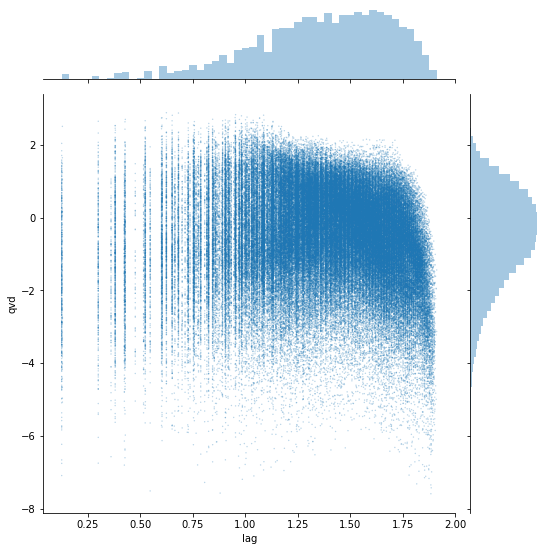

In [19]:
ax=sns.jointplot(x=np.log10(df.lag), y=np.log10(df.qvd), alpha=0.3, s=2, edgecolor='none')
ax.fig.set_size_inches(8,8)

Structure Function Data Groups

In [20]:
m=1.341#separation between lags mib valu=min lag

In [21]:
n=int(df.lag.max())//m#Number of points

In [22]:
#Grouping points
dfx=dict()

for i in range(int(n)):
    p=0+i*m
    q=m+i*m
    dfx[i]=df[df['lag'].between(p,q)]

In [23]:
dfx

{0:          lag       qvd
 0       1.34  0.000043
 598     1.34  0.000603
 1196    1.34  0.004645
 2388    1.34  0.010312
 2983    1.34  0.002850
 ...      ...       ...
 179423  1.34  0.000560
 179436  1.34  0.001271
 179441  1.34  0.000067
 179447  1.34  0.001392
 179449  1.34  0.000954
 
 [527 rows x 2 columns],
 1:              lag       qvd
 1       2.680000  0.000817
 59      2.300000  0.001176
 60      2.661879  0.000298
 599     2.680000  0.008500
 656     2.661879  0.001939
 ...          ...       ...
 179430  1.350000  0.003073
 179437  2.680000  0.001116
 179442  2.680000  0.000077
 179445  2.680000  0.001205
 179448  2.680000  0.004873
 
 [1937 rows x 2 columns],
 2:              lag       qvd
 2       4.020000  0.007934
 61      3.531629  0.000141
 659     3.531629  0.020294
 1197    2.690000  0.037659
 1252    3.531629  0.004018
 ...          ...       ...
 179424  2.690000  0.002010
 179431  2.690000  0.009911
 179438  4.020000  0.001289
 179443  4.020000  0.001295
 179

In [24]:
len(dfx)

60

Main Matrix Statistical Properties Groups

In [25]:
lgp=dict()
dl=dict()
dery=dict()
dfm=dict()
dfv=dict()
dfs=dict()
derx=dict()
dlm=dict()
dlv=dict()
dls=dict()

In [26]:
n=len(dfx)

for i in range(n):
    lgp[i]=(dfx[i]["lag"].max())
    dl[i]=len(dfx[i])#Numer of points each group
    #errorY
    dfm[i]=dfx[i]["qvd"].mean()
    dfv[i]=dfx[i]["qvd"].var()
    dfs[i]=dfx[i]["qvd"].std()
    if dl[i]>0:
        dery[i]=dfs[i]/np.sqrt(dl[i])
    #errorX
    dlm[i]=dfx[i]["lag"].mean()
    dlv[i]=dfx[i]["lag"].var()
    dls[i]=dfx[i]["lag"].std()
    if dl[i]>0:
        derx[i]=dls[i]/np.sqrt(dl[i])  


In [27]:
g=[[0]*(7) for i in range(n)]

for i in range(n):

    g[i][0]=lgp[i]
    g[i][1]=dfm[i]
    g[i][2]=dery[i]
    g[i][3]=dfs[i]
    g[i][4]=dfv[i]
    g[i][5]=dl[i]
    g[i][6]=derx[i]

In [28]:
sf=pd.DataFrame(g)
sf.columns=['Lag','Nmqvd','ErrY','StD','Var','# P','ErrX']
sf.describe()

,Lag,Nmqvd,ErrY,StD,Var,# P,ErrX
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01
mean,40.885989,3.109291,0.156801,9.388284,187.681829,2993.633333,9.147781e-03
std,23.401836,2.759113,0.165619,10.061267,339.562809,1842.242820,5.098983e-03
min,1.340000,0.005912,0.001326,0.014036,0.000197,112.000000,6.010371e-16
25%,21.115000,0.799424,0.050627,2.027015,4.122456,1474.750000,6.426731e-03
50%,40.900000,2.250726,0.115144,6.409445,41.083455,2801.500000,7.774217e-03
75%,60.675000,4.852529,0.156705,11.561940,133.678802,4387.250000,1.005990e-02
max,80.280349,9.496729,0.775584,34.711165,1204.864975,6487.000000,3.248088e-02


In [29]:
sf

,Lag,Nmqvd,ErrY,StD,Var,# P,ErrX
0,1.340000,2.026972,0.333806,7.663014,58.721780,527,6.010371e-16
1,2.680000,5.409740,0.608281,26.771294,716.702187,1937,6.860493e-03
2,4.022735,7.403574,0.775584,34.711165,1204.864975,2003,8.789859e-03
3,5.360000,7.338476,0.601158,34.244927,1172.715004,3245,6.992624e-03
4,6.700000,7.038579,0.360100,24.153543,583.393620,4499,6.494451e-03
5,8.045471,8.119038,0.460981,29.202333,852.776228,4013,6.542643e-03
6,9.380000,8.841167,0.472714,33.887395,1148.355525,5139,5.886416e-03
7,10.720000,9.496729,0.449048,33.627675,1130.820559,5608,5.047994e-03
8,12.068206,9.155644,0.389544,30.042895,902.575536,5948,5.244331e-03
9,13.410000,8.719100,0.344833,27.629691,763.399838,6420,5.694920e-03


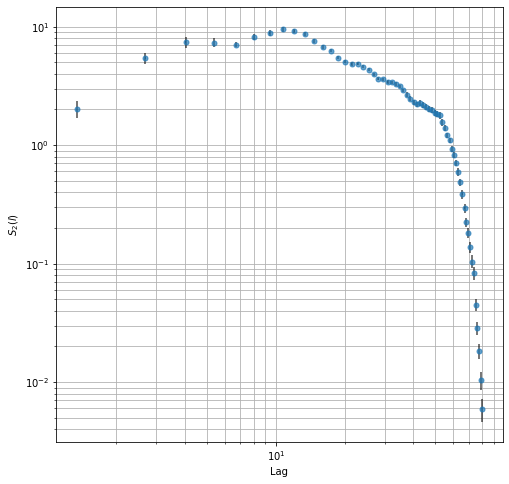

In [30]:
fig, ax=plt.subplots(figsize=(8,8))
ax.errorbar(sf['Lag'],sf['Nmqvd'],xerr=sf.ErrX,yerr=sf.ErrY, fmt="o", ecolor='k', alpha=0.7, markersize=5)
ax.set(xscale='log',yscale='log')
ax.set(xlabel='Lag', ylabel='$S_{2}(l)$')
plt.grid(True, which="both", ls="-")

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="25"

In [31]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 6.829678058624268 seconds ---
